# Caracterização meteorológica da área de estudo

Aluna: Bruna Boscato Toscani

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). 
<br>Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .
<br>Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024.
<br>Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

In [313]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241
C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\inputs\meteoSuperficie
['metar.csv.csv']


In [314]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [315]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


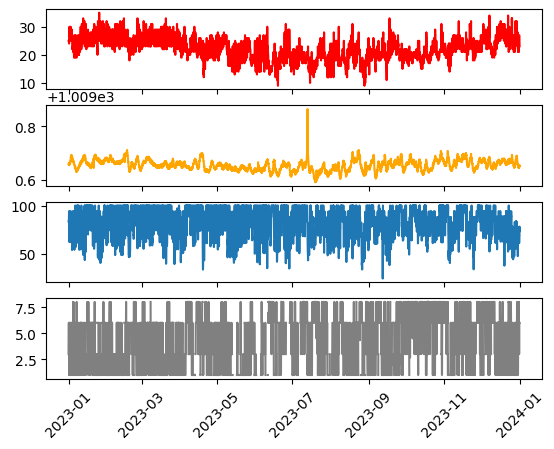

In [316]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da relh é:100.0
O percentil 99 da cco é:nan


{'whiskers': [<matplotlib.lines.Line2D at 0x21df469b8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21df46a5090>,
 'boxes': [<matplotlib.lines.Line2D at 0x21df467ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21df46a6590>],
 'fliers': [<matplotlib.lines.Line2D at 0x21df46a7010>],
 'means': []}

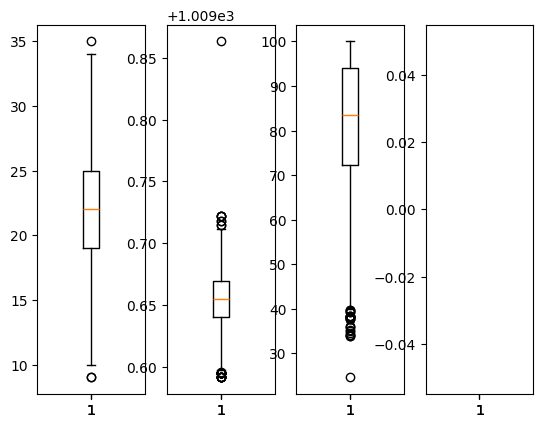

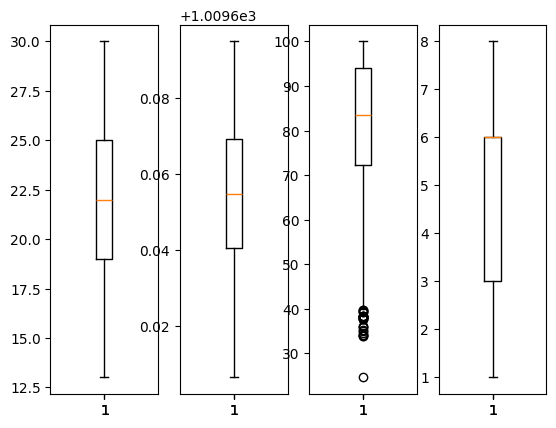

In [317]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:' + str(p99))
relh99 = np.percentile(metSuperficie['relh'],99)
print('O percentil 99 da relh é:' + str(relh99))
cco99 = np.percentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:' + str(cco99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2023-01-31  16.000000    1.0  2023.0  11.500000 NaN  203.930861  3.819839   
2023-02-28  14.493294    2.0  2023.0  11.500745 NaN  211.994368  3.374681   
2023-03-31  16.000000    3.0  2023.0  11.500000 NaN  212.134089  3.262525   
2023-04-30  15.500000    4.0  2023.0  11.500000 NaN  229.672012  3.304112   
2023-05-31  16.000000    5.0  2023.0  11.500000 NaN  248.224432  3.329711   
2023-06-30  15.500000    6.0  2023.0  11.500000 NaN  254.177680  3.727099   
2023-07-31  16.000000    7.0  2023.0  11.500000 NaN  244.600753  3.672328   
2023-08-31  16.000000    8.0  2023.0  11.500000 NaN  233.475650  4.191693   
2023-09-30  15.500000    9.0  2023.0  11.500000 NaN  230.095923  4.188015   
2023-10-31  16.000000   10.0  2023.0  11.500000 NaN  214.431250  3.726607   
2023-11-30  15.484006   11.0  2023.0  11.510431 NaN  205.173410  4.022299   

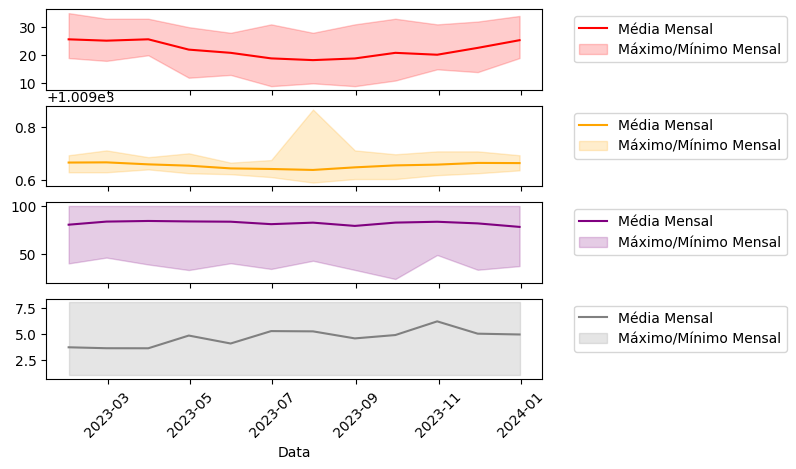

In [318]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

print(media_mensal)

# Plotando figura após fazer a média mensal, mínimo e máximo
fig, ax = plt.subplots(4, sharex=True)

# Plotando temperatura com faixa de mínimo e máximo
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média Mensal')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Plotando p com faixa de mínimo e máximo
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média Mensal')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Plotando relh com faixa de mínimo e máximo
ax[2].plot(media_mensal.index, media_mensal['relh'], color='purple', label='Média Mensal')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='purple', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Plotando coo com faixa de mínimo e máximo
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média Mensal')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Máximo/Mínimo Mensal')
ax[3].set_xlabel('Data')
ax[3].tick_params(axis='x', rotation=45)
ax[3].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Exibindo a figura
plt.show()

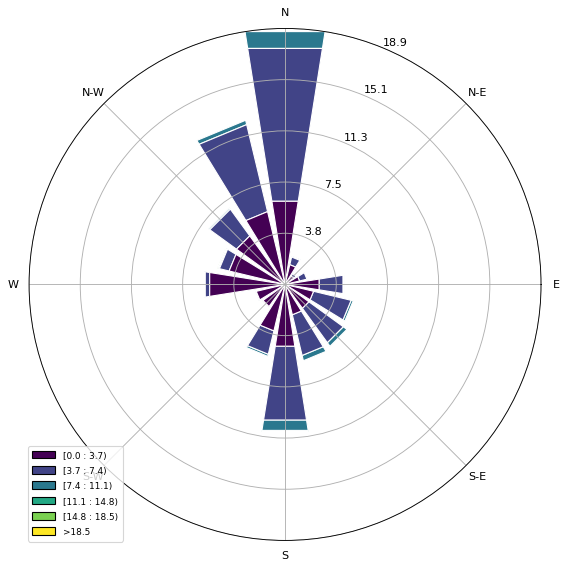

In [319]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para obter os dados para uma determinada data e estação
def get_upper_air_data(date, station):
    return WyomingUpperAir.request_data(date, station)

# Defina a data inicial e final da semana que você deseja analisar
start_date = datetime(2024, 1, 10)
end_date = datetime(2024, 1, 16)  # Defina o final da semana, neste caso, uma semana depois

# Lista para armazenar os DataFrames de cada dia
dfs = []

# Loop sobre os dias da semana
current_date = start_date
while current_date <= end_date:
    # Obtém os dados para o dia atual
    df = get_upper_air_data(current_date, 'SBFL')
    # Adiciona o DataFrame à lista
    dfs.append(df)
    # Avança para o próximo dia
    current_date += timedelta(days=1)

# Combina os DataFrames em um único DataFrame
combined_df = pd.concat(dfs)

# Exibe o DataFrame combinado
print(combined_df)

In [ ]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

In [ ]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

# Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica.

In [ ]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100., -111., 35, 43])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')